# Machine learning algoritham to detect ransomware attack

__Step1: Importing libraries__

To perform the required operations to predict the best model to detect ransomware attack, we require different kind of libaries which are imported below. 


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

# Extract, Load and Transform

__Step2:Load the dataset__

For the given task , I have taken the dataset "RansomewareData"downloaded from rissgroup.org.
Using Head() function, displayed the first 5 rows to ensure that the dataset reading was legitimate.

In [2]:
RansomeAttack = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Project\Final dissertation\RansomwareData.csv")

In [3]:
RansomeAttack.head()

,10001,1,2,0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.30925,0.30926,0.30927,0.30928,0.30929,0.30930,0.30931,0.30932,0.30933,0.30934
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Explorative Data Analysis

__Step3__

According to the taken dataset readme file , I have changed the coloumn names for better understanding and
to smooth work flow for operations.

If attack type is 1 : It is malware file ; if it is 0: Goodware file.

The Ransomware samples belong to different families that are identified with the following codes:

FAMILY NAME          ID

'Goodware'             0

'Critroni'            1

'CryptLocker'         2

'CryptoWall'          3

'KOLLAH'              4

'Kovter'              5

'Locker'              6

'MATSNU'              7

'PGPCODER'            8

'Reveton'             9

'TeslaCrypt'         10

'Trojan-Ransom'      11

In the next step, performed various operations to understand the dataset thorougly , 
and also checked for missing values to get accurate results.

In [4]:
columnames=['id','attack','type']

In [5]:
for i in range(30967):
    columnames.append(str(i))

In [6]:
RansomeAttack.columns=columnames #attribute name generation

In [7]:
RansomeAttack.columns

Index(['id', 'attack', 'type', '0', '1', '2', '3', '4', '5', '6',
       ...
       '30957', '30958', '30959', '30960', '30961', '30962', '30963', '30964',
       '30965', '30966'],
      dtype='object', length=30970)

In [8]:
RansomeAttack.describe()

,id,attack,type,0,1,2,3,4,5,6,...,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,...,1523.0,1523.000000,1523.000000,1523.000000,1523.0,1523.0,1523.000000,1523.0,1523.0,1523.000000
mean,16806.216678,0.381484,2.029547,0.296126,0.003283,0.692712,0.001970,0.518713,0.027577,0.509521,...,0.0,0.001313,0.000657,0.000657,0.0,0.0,0.000657,0.0,0.0,0.001313
std,4882.539498,0.485910,3.166189,0.456697,0.057222,0.461521,0.044353,0.499814,0.163812,0.500074,...,0.0,0.036226,0.025624,0.025624,0.0,0.0,0.025624,0.0,0.0,0.036226
min,10002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,10807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
50%,20232.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
75%,20754.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
max,21259.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000


In [9]:
RansomeAttack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Columns: 30970 entries, id to 30966
dtypes: int64(30970)
memory usage: 359.9 MB


In [10]:
RansomeAttack.shape

(1523, 30970)

In [11]:
RansomeAttack.isnull().sum()# there is null values observed.

id        0
attack    0
type      0
0         0
1         0
         ..
30962     0
30963     0
30964     0
30965     0
30966     0
Length: 30970, dtype: int64

In [12]:
RansomeAttackcopy=RansomeAttack.copy()

In [13]:
RansomeAttackcopy.head()

,id,attack,type,0,1,2,3,4,5,6,...,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


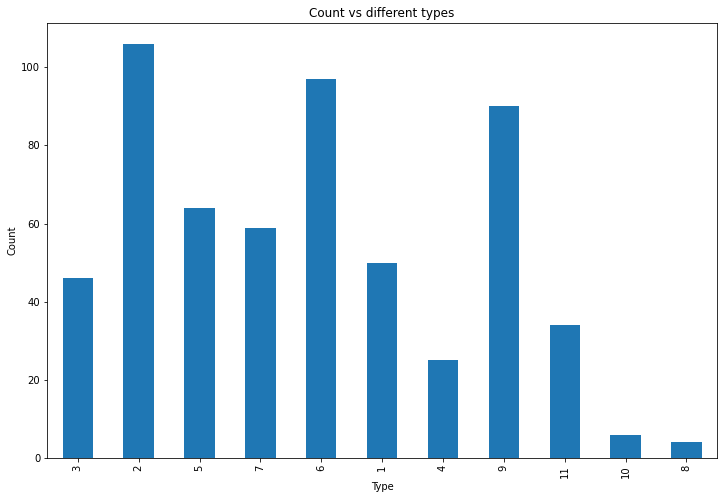

In [14]:
Ransomtypes=RansomeAttack[RansomeAttack['attack']==1]
plt.figure(figsize=(12,8))
count_classes = pd.value_counts(Ransomtypes['type'], sort = False)
count_classes.plot (kind='bar')
plt.title("Count vs different types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

## Interpretation of the above plot ##



In the above bar plot, different type of ransomware attack families were compared with each other.
From the visualisation, we recon that, cryptlocker(type2) is most happening type of ransomware in the given file.
Type'8' has lowest type of occurance in the given file.

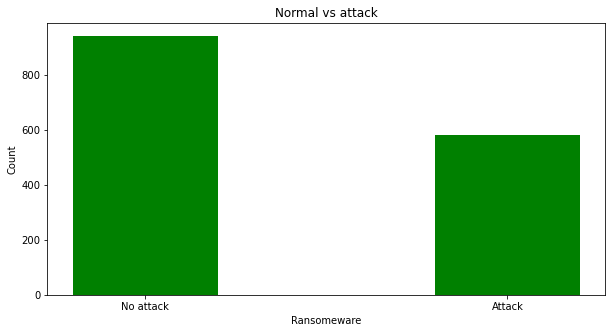

In [15]:
a=sum(RansomeAttack['attack'])
b=len(list(RansomeAttack['attack']))-a
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['No attack','Attack'], [b,a], color ='green',
        width = 0.4)

plt.title("Normal vs attack")
plt.xlabel("Ransomeware")
plt.ylabel("Count")
plt.show()

__Interpretation of the above plot__

From the above graph, in the total number of files, goodware files are approximately 900
where as malware files are around 600 files.

# Attack based Classification ##

In the below code, to explore with more results ,two classifications has been performed. 
In that on is based on the "attack" value and one is based on the "type" of ransomeware . 

__Spliting data for training and testing__

In the preceeding stpes, 75% of the data set is assigned to the training variable, 
and the remaining 25% of the data is given to the test variable

In [16]:

y=RansomeAttack.pop("attack")
y2=RansomeAttack.pop("id")
y1=RansomeAttack.pop('type')
X=RansomeAttack 

In [17]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966
0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=100) # data splitting 

In [19]:
x_train #train dataset 

,0,1,2,3,4,5,6,7,8,9,...,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966
914,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
982,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
592,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
350,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966
800,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
719,1,0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
883,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
188,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
626,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1297,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
401,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y_test

800     0
719     0
883     0
188     1
228     1
       ..
636     0
626     0
1297    0
401     1
957     0
Name: attack, Length: 381, dtype: int64

In [22]:
y_train

914    0
638    0
982    0
592    0
23     1
      ..
802    0
53     1
350    1
79     1
792    0
Name: attack, Length: 1142, dtype: int64

# Deployment of Machine learning Algorithams # 

# XGBoost Classifier

In the below lines of code, from xgboost , classfier to predict accuracy to detect attck was imported and 
fit the model for training dataset.
From the results of training dataset , applied the results as input to test data set as x_test.
Confusion Matrx and classification reports were printed to evaluate the performance of XGBoost algorithm.


In [23]:
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
xgb_clf = XGBClassifier() #XGBoost Classifier
xgb_clf.fit(x_train,y_train)
y_predict = xgb_clf.predict(x_test)
print("Classification Report :",classification_report(y_test,y_predict)) #printing classification report

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:16:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.97      0.98       233
           1       0.96      0.97      0.97       148

    accuracy                           0.97       381
   macro avg       0.97      0.97      0.97       381
weighted avg       0.97      0.97      0.97       381



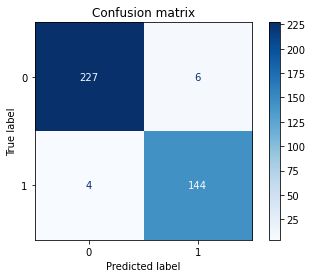

<Figure size 720x1080 with 0 Axes>

In [24]:
plot_confusion_matrix(xgb_clf, x_test, y_test,cmap=plt.cm.Blues)  
plt.title("Confusion matrix")
plt.figure(figsize=(10,15))
plt.show()

auc score 0.9736109500057999


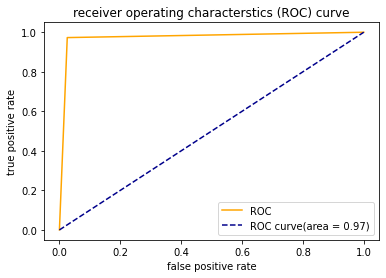

In [25]:
auc = roc_auc_score(y_test,y_predict) #finding auc value
print("auc score",auc)
fpr, tpr, thresholds = roc_curve(y_test,y_predict)

plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

__Intrepretation__

From the above intrepretations, XGBoost has obtained the accuracy of 0.97% and 
False positive and False negative values are less(4,6).
It is the good sign of XGBoost towards to Ransomware detection.

# Support Vector Machine

In [26]:
from sklearn.svm import SVC  #importing SVC module 
clf = SVC(kernel='linear') # Implementing SVC algorithm
  
# fitting x samples and y classes 
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)

print("Classification Report :",classification_report(y_test,y_predict)) # Printing classification report

Classification Report :               precision    recall  f1-score   support

           0       0.99      0.97      0.98       233
           1       0.95      0.98      0.97       148

    accuracy                           0.97       381
   macro avg       0.97      0.97      0.97       381
weighted avg       0.97      0.97      0.97       381



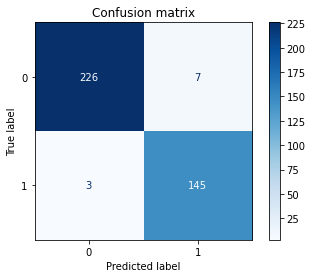

In [27]:
plot_confusion_matrix(clf, x_test, y_test,cmap=plt.cm.Blues)  # printing confusion matrix
plt.title("Confusion matrix")
plt.show()

auc score 0.974843405637397


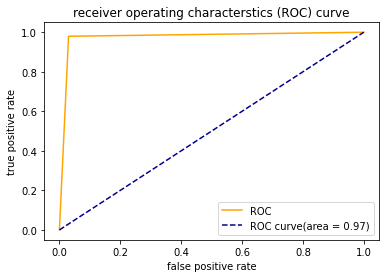

In [28]:


auc = roc_auc_score(y_test,y_predict)
print("auc score",auc)
fpr, tpr, thresholds = roc_curve(y_test,y_predict)

plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

__Intrepretation__

Based on the aforementioned interpretations, SVM has an accuracy of 0.97%, 
with low false positive and false negative numbers (7,3).
It is a positive indicator for SVM in terms of Ransomware detection.

# Logistic Regression

In the following lines of code,Logistic Regression algorithm applied.To test the performance of the Logistic Regression 
algorithm, Confusion Matrx and classification reports and AUC curve were printed.

In [29]:
log_reg = LogisticRegression() # function of Logistic Regression
log_reg.fit(x_train,y_train) #fitting the training data set
y_pred = log_reg.predict(x_test) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       233
           1       0.95      0.99      0.97       148

    accuracy                           0.98       381
   macro avg       0.97      0.98      0.98       381
weighted avg       0.98      0.98      0.98       381



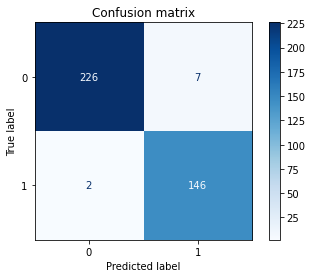

In [30]:
plot_confusion_matrix(log_reg, x_test, y_test,cmap=plt.cm.Blues)  
plt.title("Confusion matrix")
plt.show()

auc score 0.974843405637397


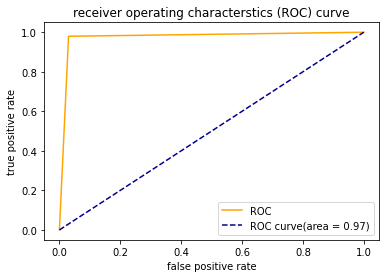

In [31]:

auc = roc_auc_score(y_test,y_predict) #finding AUC curve
print("auc score",auc)
fpr, tpr, thresholds = roc_curve(y_test,y_predict)

plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

__Interpretation__

Logistic Regression has an accuracy of 0.98% based on the aforementioned interpretations, 
with minimal false positive and false negative rates.

# Random Forest

In the preceeding stpes ,
RandomForest Classifier was imported from sklearn library and passed the training data set into this classifier
and predicted the attack and saved in y_predict.
Calculated classification report and confusion matrix and Area Under Curve.

Classification Report :               precision    recall  f1-score   support

           0       1.00      0.96      0.98       233
           1       0.94      0.99      0.97       148

    accuracy                           0.97       381
   macro avg       0.97      0.98      0.97       381
weighted avg       0.97      0.97      0.97       381



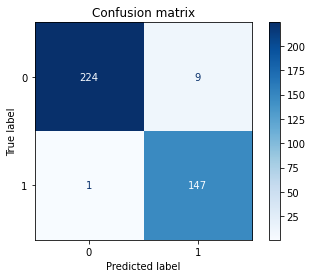

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy',random_state = 42)   
rf_clf.fit(x_train,y_train)
y_predict = rf_clf.predict(x_test)
print("Classification Report :",classification_report(y_test,y_predict))
plot_confusion_matrix(rf_clf, x_test, y_test,cmap=plt.cm.Blues)  
plt.title("Confusion matrix")
plt.show()

auc score 0.9773083169005916


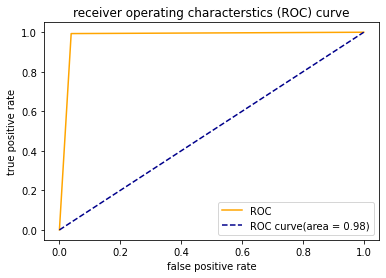

In [35]:

auc = roc_auc_score(y_test,y_predict)
print("auc score",auc)
fpr, tpr, thresholds = roc_curve(y_test,y_predict)

plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

__Intrepretation__

From the above results, Random Forest obtained 0.97 percentage and 
less False positive and False nagative values were generated.

# Type Classification

The 'type' column is assigned to the 'y1' variable, whereas all other columns pertaining to input variables are stored in the 'X' variable. 
The input characteristics and output objectives are stored in the variables 'X' and 'y1'.
After that, the variable costs are added to the train and test split,
with a test data set size of 0.25 and 75% of the data set assigned to training value, with the remaining 25% going to the test variable.

In [36]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X,y1,test_size = 0.25,random_state=100)

In [37]:
x1_train

,0,1,2,3,4,5,6,7,8,9,...,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966
914,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
982,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
592,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
350,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
x1_test

,0,1,2,3,4,5,6,7,8,9,...,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966
800,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
719,1,0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
883,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
188,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
626,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1297,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
401,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y1_train

914    0
638    0
982    0
592    0
23     2
      ..
802    0
53     1
350    2
79     2
792    0
Name: type, Length: 1142, dtype: int64

In [40]:
y1_test

800     0
719     0
883     0
188     9
228     9
       ..
636     0
626     0
1297    0
401     3
957     0
Name: type, Length: 381, dtype: int64

# XGBoost Classifier

In [41]:
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
xgb_clftype = XGBClassifier()
xgb_clftype.fit(x1_train,y1_train) #fitting the model
y1_predict = xgb_clftype.predict(x1_test) # model prediction
print("Classification Report :",classification_report(y1_test,y1_predict))

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:20:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.98      0.98       233
           1       0.80      0.73      0.76        11
           2       0.65      0.77      0.71        22
           3       0.60      0.40      0.48        15
           4       0.80      0.50      0.62         8
           5       0.95      0.86      0.90        21
           6       0.54      0.50      0.52        28
           7       0.45      0.60      0.51        15
           8       0.00      0.00      0.00         1
           9       0.70      0.80      0.74        20
          10       0.00      0.00      0.00         0
          11       0.43      0.43      0.43         7

    accuracy       

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.

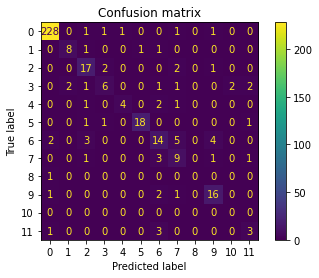

In [42]:

plot_confusion_matrix(xgb_clftype, x1_test, y1_test,cmap=plt.cm.viridis)  
plt.title("Confusion matrix")
plt.show()

__Interpretation__

All of the diagonal values in the given matrix are True positive values of the malware family. 
Except for these values, all other values are less. 
The accuracy gained from the XGBoost algorithm's classification report was 0.85%.

# Support Vector Machine

In [43]:
from sklearn.svm import SVC  
clftype = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clftype.fit(x1_train,y1_train)
y1_predict = clftype.predict(x1_test)

print("Classification Report :",classification_report(y1_test,y1_predict))

Classification Report :               precision    recall  f1-score   support

           0       0.98      0.98      0.98       233
           1       0.82      0.82      0.82        11
           2       0.44      0.50      0.47        22
           3       0.50      0.40      0.44        15
           4       1.00      0.62      0.77         8
           5       0.81      0.81      0.81        21
           6       0.57      0.43      0.49        28
           7       0.39      0.60      0.47        15
           8       0.00      0.00      0.00         1
           9       0.75      0.75      0.75        20
          10       0.00      0.00      0.00         0
          11       0.38      0.43      0.40         7

    accuracy                           0.83       381
   macro avg       0.55      0.53      0.53       381
weighted avg       0.84      0.83      0.83       381



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.

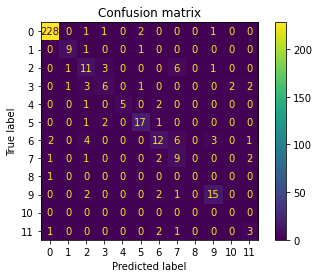

In [44]:

plot_confusion_matrix(clftype, x1_test, y1_test,cmap=plt.cm.viridis)  
plt.title("Confusion matrix")
plt.show()


__Interpretation__

 The classification report generated by the SVM algorithm has an accuracy of 0.83%.

# Logistic Regression

In [45]:
log_regtype = LogisticRegression() 
log_regtype.fit(x1_train,y1_train) # fitting Logistic Regression
y1_pred = log_regtype.predict(x1_test) # predicting results from Logistic Regression
print(classification_report(y1_test,y1_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       233
           1       1.00      0.73      0.84        11
           2       0.44      0.55      0.49        22
           3       0.55      0.40      0.46        15
           4       1.00      0.25      0.40         8
           5       0.86      0.90      0.88        21
           6       0.57      0.46      0.51        28
           7       0.36      0.60      0.45        15
           8       0.00      0.00      0.00         1
           9       0.82      0.70      0.76        20
          10       0.00      0.00      0.00         0
          11       0.38      0.43      0.40         7

    accuracy                           0.83       381
   macro avg       0.58      0.50      0.51       381
weighted avg       0.84      0.83      0.83       381



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.

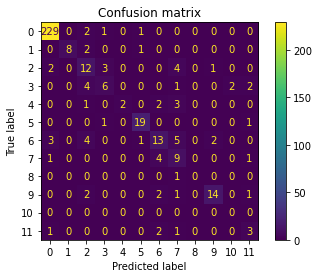

In [46]:

plot_confusion_matrix(log_regtype, x1_test, y1_test,cmap=plt.cm.viridis)  
plt.title("Confusion matrix")
plt.show()

__Interpretation__

The classification report generated by the Logistic Regression algorithm has an accuracy of 0.83%.

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_clftype = RandomForestClassifier(criterion='entropy',random_state = 42)   
rf_clftype.fit(x1_train,y1_train)
y1_predict = rf_clftype.predict(x1_test)
print("Random Forest Classification Report :",classification_report(y1_test,y1_predict))


Random Forest Classification Report :               precision    recall  f1-score   support

           0       0.92      1.00      0.96       233
           1       1.00      0.73      0.84        11
           2       0.53      0.41      0.46        22
           3       0.58      0.47      0.52        15
           4       1.00      0.62      0.77         8
           5       0.83      0.71      0.77        21
           6       0.64      0.50      0.56        28
           7       0.47      0.60      0.53        15
           8       0.00      0.00      0.00         1
           9       0.83      0.75      0.79        20
          10       0.00      0.00      0.00         0
          11       0.38      0.43      0.40         7

    accuracy                           0.83       381
   macro avg       0.60      0.52      0.55       381
weighted avg       0.83      0.83      0.83       381



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.

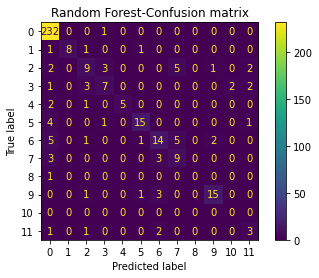

In [48]:
plot_confusion_matrix(rf_clftype, x1_test, y1_test,cmap=plt.cm.viridis)
plt.title("Random Forest-Confusion matrix")
plt.show()

# Overall Interpretation #

XGBoost got an accuracy of 0.97% in the attack-based classification, and the values retrieved from the confusion matrix are [[227,06], [4,144]]. whereas the Support Vector Model has an accuracy of 0.97% and confusion matrix values of [[226,7],[3,145]]. The logistic regression algorithm generated 0.98% accuracy with confusion matrix values [[226,7], [2,146]], 
whereas the Random Forest algorithm produced 0.97 percent accuracy with confusion matrix cell values [[224,9] [1,147]]. 
In summary, the Logistic Regression method is the greatest choice for detecting ransomware files, although the other algorithms produce a high percentage of accuracy. 
False positive and false negative scores are lower, ranging from 1 to 7 in between.

For type based classification, the XGBoost algorithm achieved 0.85% accuracy, with False Negative and False Positive scores in the range of 0 to 2. 
The Support Vector Model achieved 0.83% accuracy, 
while the Logistic Regression and Random Forest methods achieved 0.83% accuracy. 
All of the models had false positive and false negative values between o and 2, showing that the model is accurate in its predictions.
If ransomware kind is a target variable, XGBoost is one of the finest malware prediction options.